In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [3]:
studentData = pd.read_csv('dataset.csv')
studentData.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
print(studentData.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [5]:
# Extract Response and Predictors
y = pd.DataFrame(studentData["Target"].astype('category'))
X = pd.DataFrame(studentData[["Marital status", "Gender", "Father's occupation", "Mother's occupation"]])

# Multi-Variate Classification Tree with anomalies
The third model we will use is Multi-Variate Decision Tree Classifier model, once again we will compare the performance of this model with and without anomalies.  

The predictors that seemingly have the most impact on predicting whether the student will dropout or not are Marital Status, Gender, Father's occupation and Mother's occupation. Hence, based on these predictors, we will set up the respective multi-variate classification tree and observe the response to confirm or deny this assumption. 

Response Variable : **Target**     
Predictor Feature : **Marital status, Gender, Father's occupation, Mother's occupation**  

Train Set : (3318, 1) (3318, 4)
Test Set  : (1106, 1) (1106, 4)


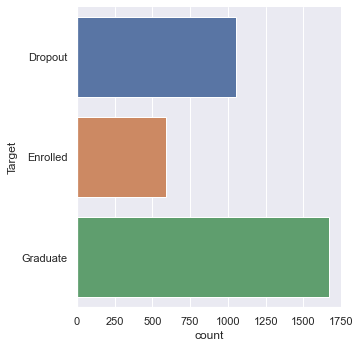

In [6]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Target", data = y_train, kind = "count")

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

if want make it longer can draw distribution of predictors also but i dont see a need bcz we looking at the r/s 

AttributeError: 'PathCollection' object has no property 'native_scale'

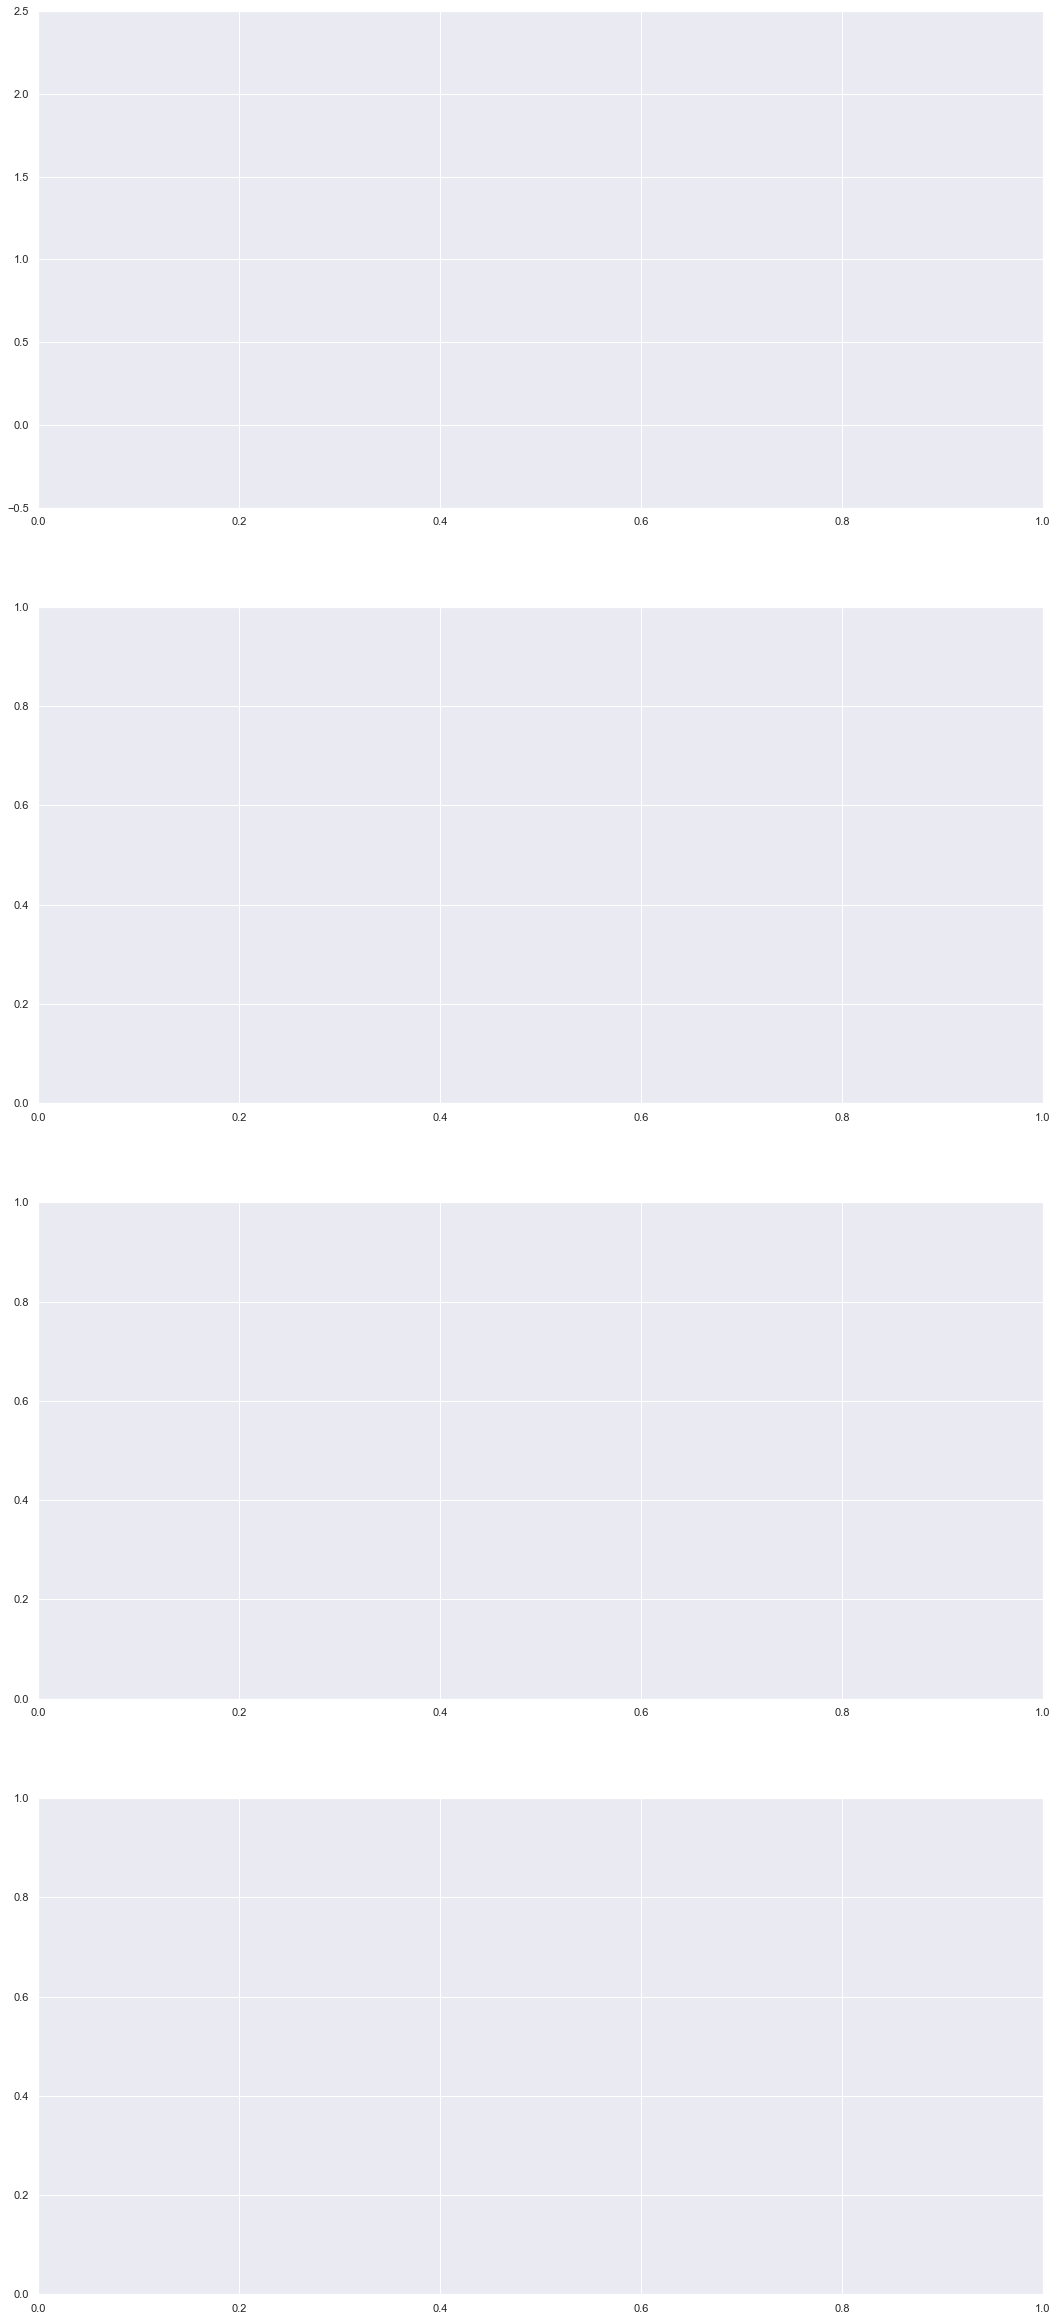

In [21]:
# Relationship between Response and the Predictors
df = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(4, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.swarmplot(x = var, y = "Target", data = sDF, orient = "h", ax = axes[count],native_scale=True)
    count += 1

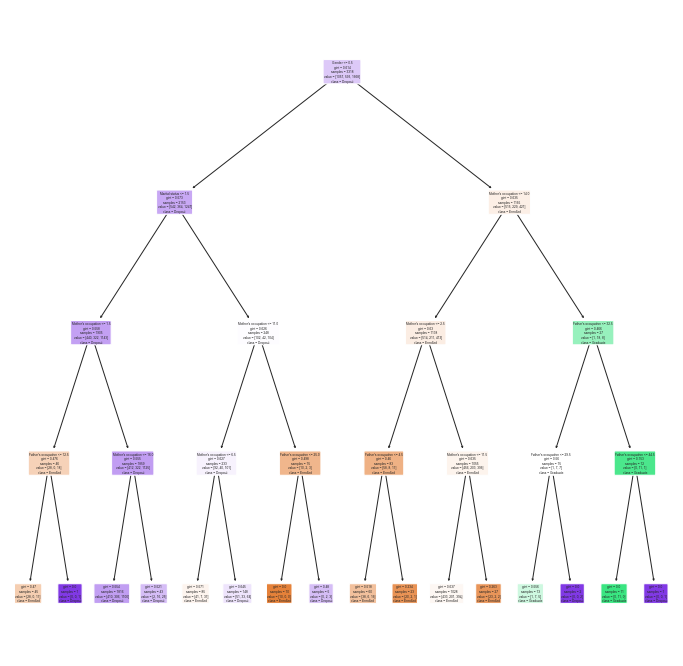

In [22]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Enrolled", "Graduate","Dropout"])

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5446051838456901

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5506329113924051



<AxesSubplot:>

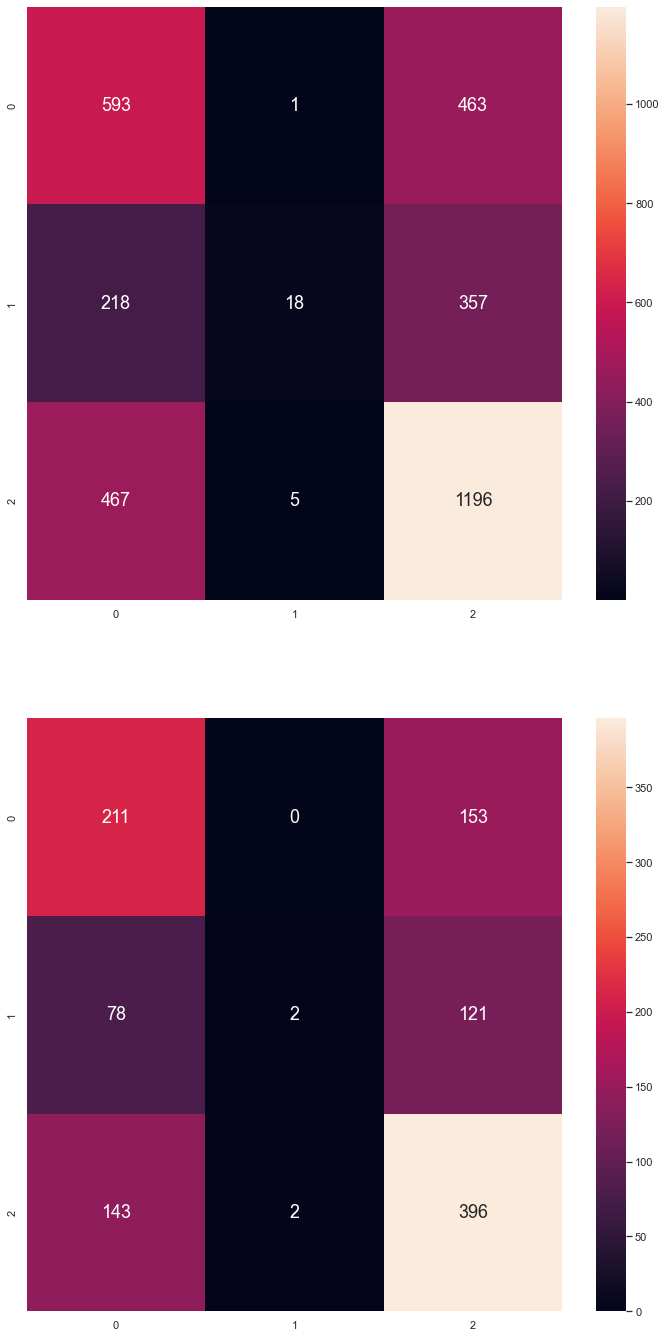

In [24]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

As can be seen, the classification accuracy is very low when the model is created without removing anomalies. Now, we will remove anomalies using the 2 ways, Local Outlier Factor and Isolation Forest.

# Multi-Variate Classification Tree without anomalies

In [12]:
# import libraries i need
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest

In [25]:
# function to prepare data for anomaly detection
def prepare_for_anomaly(df):
    features = ["Target", "Marital status", "Curricular units 1st sem (grade)", "Mother's occupation"]
    cat_features = ["Target","Mother's occupation", "Marital status"]
    anomDf = df[features].copy()

    # change to names
    for col in cat_features:
        anomDf[col].replace(convert_numeric_to_cat(col), inplace=True)
        
    # combine certain minority categories
    anomDf["Marital status"][(anomDf["Marital status"] != "Single") & (anomDf["Marital status"] != "Married")] = "Others"
    anomDf["Mother's occupation"][(anomDf["Mother's occupation"] != "Student") & (anomDf["Mother's occupation"] != "Unskilled Workers")] = "Others"
      
    # one hot encode
    anomDf_ohe = anomDf[cat_features]
    ohe = OneHotEncoder()
    ohe.fit(anomDf_ohe)
    anomDf_ohe = pd.DataFrame(ohe.transform(anomDf_ohe).toarray(), columns=ohe.get_feature_names_out(anomDf_ohe.columns))
    
    anomDf_ohe["Curricular units 1st sem (grade)"] = anomDf["Curricular units 1st sem (grade)"]
     
    return anomDf, anomDf_ohe

## Using Local Outlier Factor

In [30]:
def remove_anomaly_lof(df, n_neighbours = 10, plot = False):
    anomDf, anomDf_ohe = prepare_for_anomaly(df)
    # build model
    model = LocalOutlierFactor(n_neighbors=n_neighbours, contamination="auto")
    
    # fit model
    pred = model.fit_predict(X=anomDf_ohe)
    neg_outlier_factor = model.negative_outlier_factor_
    
    if plot:
        f,axes = plt.subplots(1,2,figsize=(20,5))
        ax = sb.countplot(x=pred, ax=axes[0])
        ax.set_title("Predictor", fontsize=18)
        ax = sb.boxplot(x=factor, ax=axes[1])
        ax.set_title("Negative Outlier Factor", fontsize=18)
    
    return anomDf, pred, neg_outlier_factor

In [31]:
anomDf, pred, factor = remove_anomaly_lof(df, 15, True)

KeyError: "['Curricular units 1st sem (grade)'] not in index"

In [32]:
outlierDf = anomDf[pred == -1].copy()
outlierDf.count()

NameError: name 'anomDf' is not defined

In [33]:
# visually inspect outliers, seem correct
# checking for the following expected outlier:
# mother is student and graduate
cond = (outlierDf["Mother's occupation"] == "Student") & (outlierDf["Target"] == "Graduate")
print(outlierDf[cond].count())
outlierDf[cond].head(20)

NameError: name 'outlierDf' is not defined

## Using Isolation Forest

In [41]:
def remove_anomaly_iforest(df, n_estimators = 100, plot = False):
    anomDf, anomDf_ohe = prepare_for_anomaly(df)
    # build model
    model = IsolationForest(n_estimators=n_estimators, contamination=0.1, random_state=888)
    
    # fit model
    pred = model.fit(X=anomDf_ohe.values).predict(anomDf_ohe.values)
    
    if plot:
        #f,axes = plt.subplots(1,2,figsize=(20,5))
        ax = sb.countplot(x=pred)
        ax.set_title("Predictor", fontsize=18)
        #ax = sb.boxplot(x=factor, ax=axes[1])
        #ax.set_title("Negative Outlier Factor", fontsize=18)
        print("Anomaly count")
        print(anomDf[pred == -1].count())
    
    return anomDf, pred

In [42]:
anomDf, pred = remove_anomaly_iforest(df, 100, True)

KeyError: "['Curricular units 1st sem (grade)'] not in index"

In [43]:
outlierDf = anomDf[pred == -1].copy()
cond = (outlierDf["Mother's occupation"] == "Student") & (outlierDf["Target"] == "Graduate")
print(outlierDf[cond].count())
outlierDf[cond].head(20)

NameError: name 'anomDf' is not defined

In [44]:
# Remove Anomalies using Isolation Forest 2
anomDf, pred = remove_anomaly_iforest(df, 100, True)

# The dataframe without the anomalies
noOutlierDf = anomDf[pred == 1].copy()

clean_X = []
clean_y = []
for i, score in enumerate(anomaly_scores):
    if score == 1: # inlier
        clean_X.append(X[i])
        clean_y.append(y[i])
        
        # Relationship between Response and the Predictors
df = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

KeyError: "['Curricular units 1st sem (grade)'] not in index"

Train Set : (3318, 1) (3318, 4)
Test Set  : (1106, 1) (1106, 4)


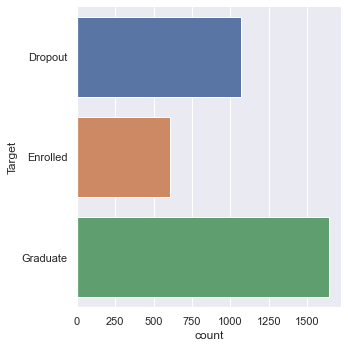

In [45]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "Target", data = y_train, kind = "count")

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

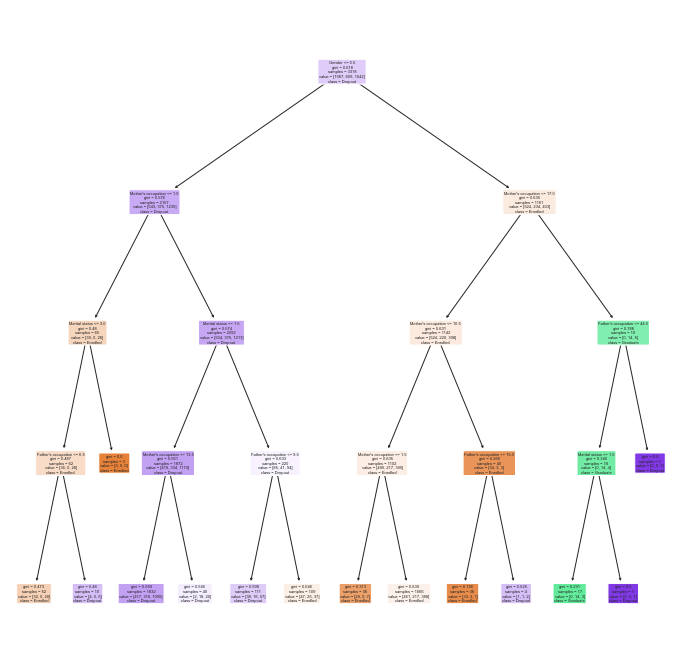

In [46]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Enrolled", "Graduate","Dropout"])

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5440024110910187

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5452079566003617



<AxesSubplot:>

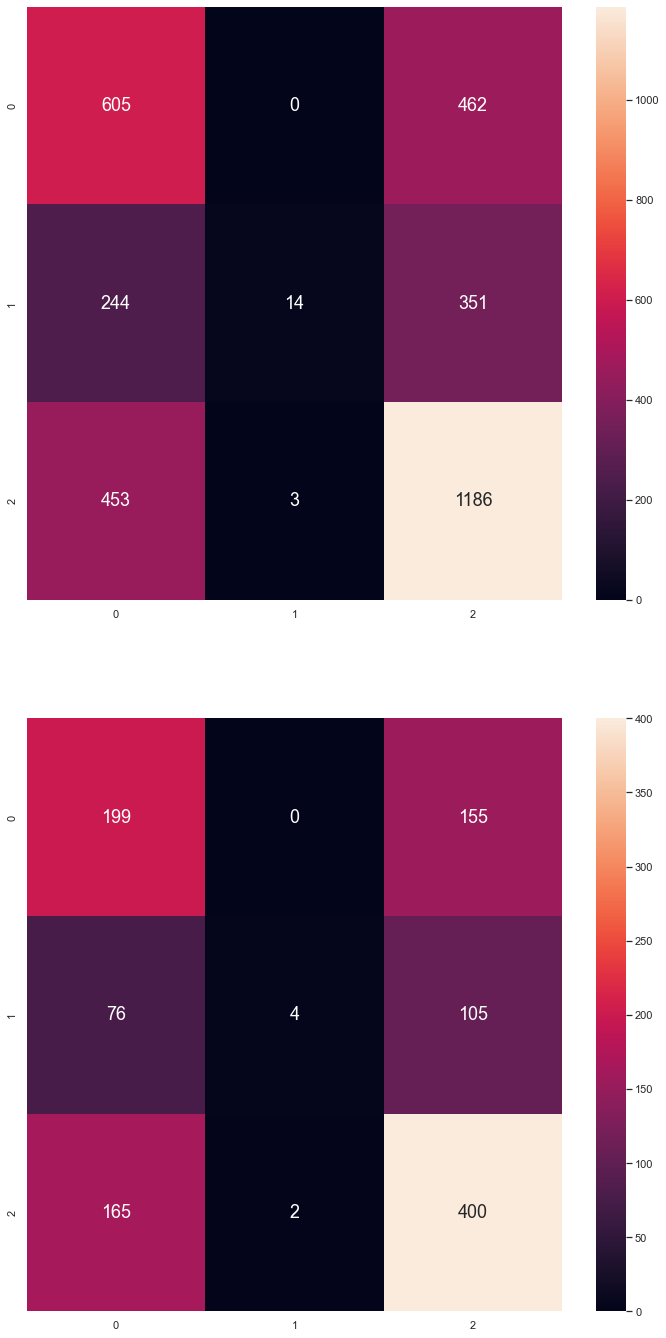

In [47]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])